# MNIST with machine learning

In this exercise we will give MNIST digits another try, but this time we will apply what we've learnt about machine learning algorithms. The idea is to correctly estimate the best parameter(s) for an algorithm in order to get the highest accuracy. At the end of this exercise you will upload your results to [this Kaggle contest](https://www.kaggle.com/c/digit-recognizer).

## Loading the dataset

Here we will load the Kaggle training set and test set. The training is a CSV with 42000 rows and 785 columns (28x28 pixels + 1 label), while the test set has 28000 rows and 784 columns. The test set in this exercise is used only for submission to Kaggle, which means you will have to do cross-validation on only the training set.

In [0]:
import pandas as pd
import numpy as np

#data = pd.read_csv("train.csv")
#test_data = pd.read_csv("test.csv")
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


We visualize training data and its types.

In [0]:
data=pd.read_csv('gdrive/My Drive/train.csv')
#print(data.dtypes)
data.head()
print(data)
#print(type(data))

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

We can see that the first column here is the label that indicates the digit of the corresponding pixels. We will change its type to be categorical. 

In [0]:
data.label = data.label.astype("category")
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

We can see that the different labels are somewhat evenly distributed. We can also describe a column to see the different values a pixel can take.

In [0]:
data.pixel110.describe()

count    42000.000000
mean         0.002881
std          0.590420
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        121.000000
Name: pixel110, dtype: float64

## Workshop: Fitting KNN

Integrantes (3 max):
- Integrante 1 :JEAN CARLOS ORTIZ RIASCOS A00346333
- Integrante 2 JHUSSETH ARIAS A00048440

We will now fit a KNN model to the data, first we split the data to perform stratified cross validation. We have to stratify since the probabilities of each label are slightly different.

### Splitting the data

We will split the data using 20% of it as a **validation** set.

In [0]:
from sklearn.model_selection import train_test_split

muestra=data.sample(frac=0.2,replace=False)

#print(muestra["label"])

#data_train_pred, data_test_pred, data_train_c, data_test_c = train_test_split(data.drop("label", axis = 1), data.loc[:,["label"]], test_size = 0.2)
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data.iloc[:,1:783]),	data.label, test_size=0.25, random_state=42)
print("listo")



#data_train_pred, data_test_pred, data_train_c, data_test_c = train_test_split(data.drop("c", axis = 1), data.loc[:,["c"]], test_size = 0.2)



# TODO: Here you will split the data using scikit-learn train_test_split function

listo


In [0]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,	test_size=0.2, random_state=84)
print("listo")

listo


In [0]:
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 20160
validation data points: 5040
testing data points: 10500


In [0]:

print(f"Train X: {(len(data_train_pred))}")
print(f"Train Y: {(len(data_train_c))}")
print(f"Test X: {(len(data_test_pred))}")
print(f"Test Y: {(len(data_test_c))}")

data_train_pred.head()


Train X: 33600
Train Y: 33600
Test X: 8400
Test Y: 8400


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Finding the K

Now we will find the K by trying powers of 10 followed by different K's 1000 at a time until an arbitrarilly chosen 30000 neighbors max.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
ks = range(1,30,2)
k_error = []

for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(trainData, trainLabels)
 
	# evaluate the model and update the accuracies list
	score = model.score(valData, valLabels)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	k_error.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(k_error))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (ks[i],
	k_error[i] * 100))
print("hola")
#_ = sns.lineplot(x = "k", y = "error", data = error_data)

k=1, accuracy=95.91%
k=3, accuracy=96.21%
k=5, accuracy=96.13%
k=7, accuracy=95.85%
k=9, accuracy=95.73%
k=11, accuracy=95.50%
k=13, accuracy=95.34%
k=15, accuracy=95.32%
k=17, accuracy=95.02%
k=19, accuracy=94.82%
k=21, accuracy=94.68%
k=23, accuracy=94.48%
k=25, accuracy=94.29%
k=27, accuracy=94.15%
k=29, accuracy=93.99%
k=3 achieved highest accuracy of 96.21% on validation data
hola


In [0]:
from sklearn.neighbors import KNeighborsClassifier

# TODO: Here you will choose the possible K values



Now we will visualize the error result.

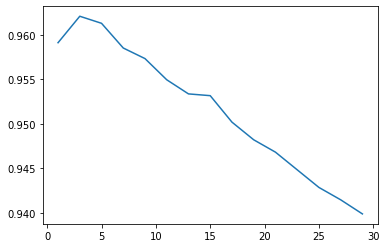

In [0]:
import matplotlib.pyplot as plt

plt.plot(ks, k_error)